In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intgr
import matplotlib.animation as anim

In [3]:
def equations(X, t, r, l, omega, theta_1, theta_2):
  phi, eta = X
  d_phi = eta
  g = 9.8     # Constant

  # Calculate components separately
  # Coefficient (Constant)
  coeff = r * omega * (theta_1 - theta_2) / 2

  # Theta function
  theta_t = (theta_1 - theta_2) / 2 * np.cos(omega*t) + (theta_1 + theta_2) / 2
  d_theta_t = -omega * (theta_1 - theta_2) / 2 * np.sin(omega*t)

  # d_eta in two parts
  first = 1/l * (coeff * (np.sin(theta_t) * np.sin(omega*t) * d_theta_t - omega * np.cos(theta_t) * np.cos(omega*t) - g)) * np.sin(phi)
  second = 1/l * coeff * (np.cos(theta_t) * np.sin(omega*t) * d_theta_t + omega * np.sin(theta_t) * np.cos(omega*t)) * np.cos(phi)

  # Lagrange's Equation 
  d_eta = first - second
  
  return [d_phi, d_eta]

In [4]:
def init(r=1, l=10, omega=30, theta_1=3*np.pi/4, theta_2=np.pi/4, phi0=0.1, eta0=0.0, T=10):
  t = np.arange(0, T, 0.01)    # time points to evaluate solution at

  sol = intgr.odeint(equations, [phi0, eta0], t, args=(r, l, omega, theta_1, theta_2))
  phi = sol[:,0]
  return r, l, omega, phi, theta_1, theta_2, t


# r: oscillation radius, l: length of rod, phi: angle of mass movement
# theta_1 & theta_2: max/min angle for oscillation

# Default Case
#r, l, omega, phi, theta_1, theta_2, t = init()

# Test Cases
# r, l, omega, phi, theta_1, theta_2, t = init(theta_1=(1/2+1/10)*np.pi, theta_2=(1/2-1/10)*np.pi)
r, l, omega, phi, theta_1, theta_2, t = init(theta_1=3/7*np.pi, theta_2=0*(-1/7)*np.pi, omega=70, l=100)

# Plot 2D position of Mass
theta_t = (theta_1 - theta_2) / 2 * np.cos(omega*t) + (theta_1 + theta_2) / 2

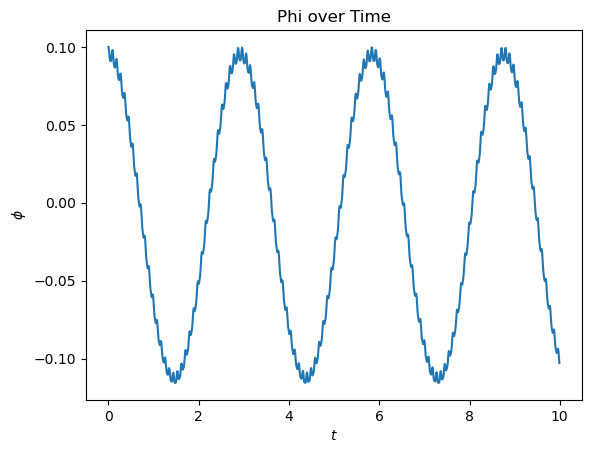

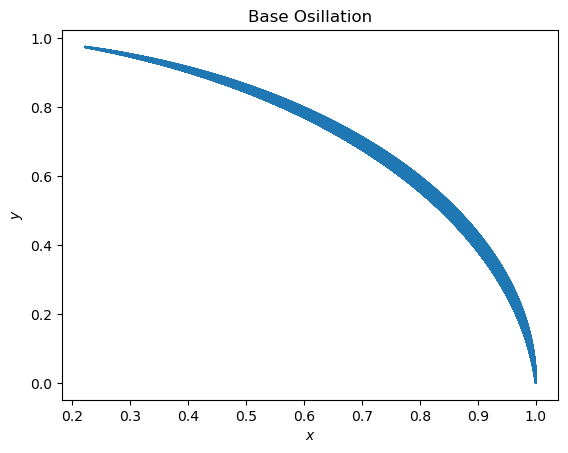

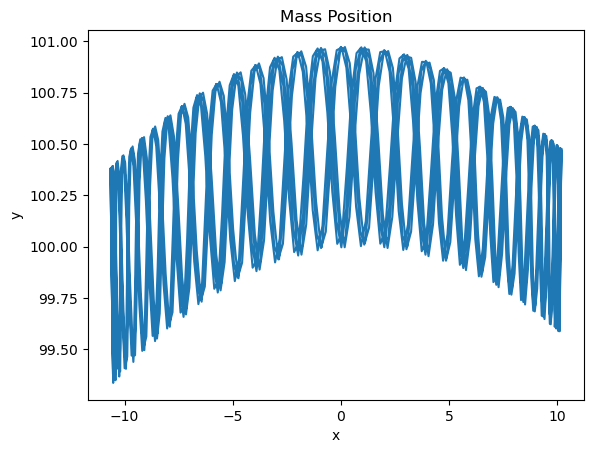

In [5]:
plt.figure()
plt.title(r"Phi over Time")
plt.plot(t, phi)    # plot angle as a function of time
plt.xlabel(r'$t$')
plt.ylabel(r'$\phi$')
plt.show()

base_x = r * np.cos(theta_t)
base_y = r * np.sin(theta_t)
plt.figure()
plt.title(r"Base Osillation")
plt.plot(base_x, base_y)    # plot angle as a function of time
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

mass_x = l * np.sin(phi) + r * np.cos(theta_t) # CHECK: use correct angle (with respect to vertical or horizontal)
mass_y = l * np.cos(phi) + r * np.sin(theta_t)
plt.figure()
plt.title(r"Mass Position")
plt.plot(mass_x, mass_y)
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.show()

In [6]:
plt.rcParams["animation.html"] = "jshtml"
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(-0.8, 1.7)
ax.set_ylim(-1.5, 2.5)
ax.axis('off')
p0, = ax.plot([], [], '-')
p1, = ax.plot([], [], 'o')

time = t

def animate(t):
    x_osc = r * np.cos(theta_t[t])
    y_osc = r * np.sin(theta_t[t])
    Xt = np.sin(phi[t]) + x_osc
    Yt = np.cos(phi[t]) + y_osc
    p0.set_data([Xt, x_osc], [Yt, y_osc])
    p1.set_data([Xt], [Yt])

mov = anim.FuncAnimation(fig, animate, frames=len(time), interval=10)
plt.close()

In [7]:
mov

In [9]:
# Vertical Oscillation (Testing)
def equations(X, t, A, omega, l):    # calculate time derivatives
    phi, eta = X    # parse variables
    d_phi = eta

    g = 9.8
    d_eta = (-g/l - A/l * omega**2 * np.cos(omega*t)) * np.sin(phi)
    return [d_phi, d_eta]    # assemble derivatives into an array

In [10]:
def init(A=0.1, omega=30, phi0=0.1, eta0=0.0, T=10, length=10):
  time = np.arange(0, T, 0.01)    # time points to evaluate solution at

  sol = intgr.odeint(equations, [phi0, eta0], time, args=(A, omega, length))    # solve equations
  phi = sol[:,0]    # theta is the first component of solution
  return A, omega, phi0, eta0, T, time, sol, phi, length

A, omega, phi0, eta0, T, time, sol, phi, length = init()

# Plot 2D Position of Mass
x = length * np.sin(phi)
y = length * np.cos(phi) + A * np.cos(omega*time)

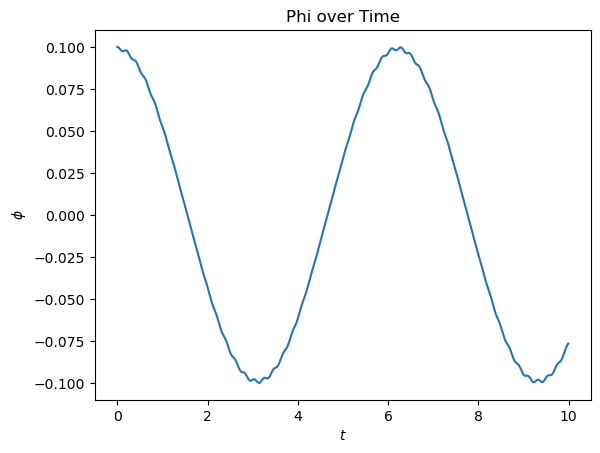

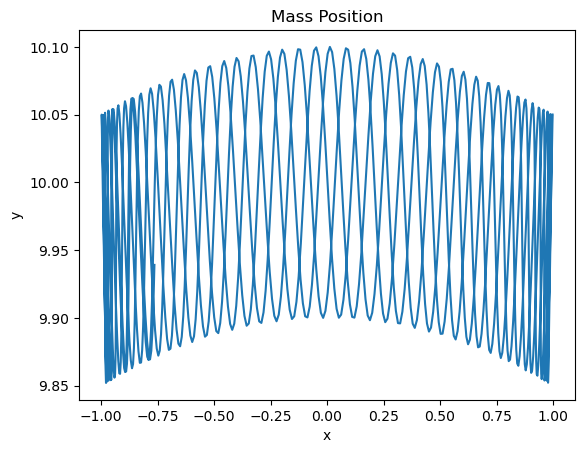

In [11]:
plt.figure()
plt.title(r"Phi over Time")
plt.plot(time, phi)    # plot angle as a function of time
plt.xlabel(r'$t$')
plt.ylabel(r'$\phi$')
plt.show()

plt.figure()
plt.title(r"Mass Position")
plt.plot(x, y)
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.show()

In [12]:
import matplotlib.animation as anim

plt.rcParams["animation.html"] = "jshtml"
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.7, 1.5)
ax.axis('off')
p0, = ax.plot([], [], '-')
p1, = ax.plot([], [], 'o')

def animate(t):
    Zt = A * np.cos(omega * time[t])
    Xt = np.sin(phi[t])
    Yt = np.cos(phi[t]) + Zt
    p0.set_data([Xt, 0], [Yt, Zt])
    p1.set_data([Xt], [Yt])

mov = anim.FuncAnimation(fig, animate, frames=len(time), interval=10)
plt.close()

In [13]:
mov

In [14]:
# Result verfication (compared to given vertical oscillation results)
def equations(X, t, A, omega, l):    # calculate time derivatives
    phi, eta = X    # parse variables
    d_phi = eta

    g = 9.8
    d_eta = (-g/l - A/l * omega**2 * np.cos(omega*t)) * np.sin(phi)
    return [d_phi, d_eta]    # assemble derivatives into an array

def init(A=0.1, omega=30, phi0=0.1, eta0=0.0, T=10, length=10):
  time = np.arange(0, T, 0.01)    # time points to evaluate solution at

  sol = intgr.odeint(equations, [phi0, eta0], time, args=(A, omega, length))    # solve equations
  phi = sol[:,0]    # theta is the first component of solution
  return A, omega, phi0, eta0, T, time, sol, phi, length

A, omega, phi0, eta0, T, time, sol, phi, length = init()

test_x = length * np.sin(phi)
test_y = length * np.cos(phi) + A * np.cos(omega*time)

# From given vertical oscillation approach
def equations(X, t, alpha, omega):    # calculate time derivatives
    theta, eta = X    # parse variables
    d_theta = eta
    # Omega_nt = g / l (pendulum length)
    omega_nt = 1 # Set to be 1
    d_eta = (omega_nt**2 - alpha * omega**2 * np.cos(omega*t)) * np.sin(theta)
    return [d_theta, d_eta]    # assemble derivatives into an array

def init(alpha=0.1, omega=30, theta0=0.1, eta0=0.0, T=10, length=10):
  time = np.arange(0, T, 0.01)    # time points to evaluate solution at
  sol = intgr.odeint(equations, [theta0, eta0], time, args=(alpha, omega))    # solve equations
  theta = sol[:,0]    # theta is the first component of solution
  return alpha, omega, theta0, eta0, T, time, sol, theta, length

alpha, omega, theta0, eta0, T, time, sol, theta, length = init(alpha = 0.01)
A = alpha * length

# Print MSE 
ref_x = length * np.sin(theta)
ref_y = length * np.cos(theta) + A * np.cos(omega*time)
MSE = np.sqrt((ref_y - test_y) ** 2 + (ref_x - test_x) ** 2)
MSE = np.sum(MSE) / len(MSE)
print("MSE: %.4f" %MSE)

# Print r2
SSR = np.sum(np.sqrt((ref_y - test_y) ** 2 + (ref_x - test_x) ** 2))
x_bar = np.average(ref_x)
y_bar = np.average(ref_y)
SST = np.sum(np.sqrt((ref_y - y_bar) ** 2 + (ref_x - x_bar) ** 2))
r2 = 1 - SSR / SST
print("x_bar: %.4f" %x_bar)
print("y_bar: %.4f" %y_bar)
print("SSR: %.4f" %SSR)
print("SST: %.4f" %SST)
print("r2: %.4f" %r2)

MSE: 6.5416
x_bar: -0.1223
y_bar: 5.9427
SSR: 6541.5689
SST: 7052.8748
r2: 0.0725
